In [1]:
%matplotlib inline
import sys, os
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import sys
import sql_tools as sql
from scipy.stats import binned_statistic_2d as bs2d
from scipy.stats import binned_statistic as bs1d

Populating the interactive namespace from numpy and matplotlib


In [58]:
gid = 12681787
gid = 12143703
gid = 10694572
con         = sql.connect(user="jtrayford")

In [29]:
query = """
select 
        tree.galaxyid, tree.starformationrate, tree.redshift, snap.lookbacktime
from 
        eagle..refl0100n1504_subhalo as jelly,
        eagle..refl0100n1504_subhalo as tree,
        eagle..snapshots as snap
        
where
        jelly.galaxyid = %d 
        
        and

        ((tree.snapnum >  jelly.snapnum and jelly.galaxyid between tree.galaxyid and tree.topleafid) or
        (tree.snapnum <= jelly.snapnum and tree.galaxyid between jelly.galaxyid and jelly.topleafid))
        
        and
        
        tree.snapnum = snap.snapnum
order by
        tree.redshift

"""

data1 = sql.execute_query(con, query%gid)
print data1['galaxyid']


fetch  27
fetch  0
[10694571 10694572 10694573 10694574 10694575 10694576 10694577 10694578
 10694579 10694580 10694581 10694582 10694583 10694584 10694585 10694586
 10694587 10694588 10694589 10694590 10694591 10694592 10694593 10694594
 10694595 10694596 10694597]


[10694571 10694572 10694573 10694574 10694575 10694576 10694577 10694578
 10694579 10694580 10694581 10694582 10694583 10694584 10694585 10694586
 10694587 10694588 10694589 10694590 10694591 10694592 10694593 10694594
 10694595 10694596 10694597] [2.22044605e-16 1.00638539e-01 1.82709873e-01 2.70901084e-01
 3.65668565e-01 5.03107309e-01 6.15189791e-01 7.35629618e-01
 8.65050554e-01 1.00412166e+00 1.25933146e+00 1.48670733e+00
 1.73696578e+00 2.01241016e+00 2.23703694e+00 2.47841334e+00
 3.01650453e+00 3.52797651e+00 3.98366356e+00 4.48521376e+00
 5.03723669e+00 5.48741531e+00 5.97116232e+00 7.04956627e+00
 8.07461643e+00 8.98787498e+00 9.99303341e+00]


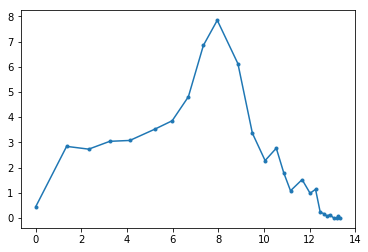

In [31]:
plt.plot(data1['lookbacktime'], data1['starformationrate'], ls='-', marker='.')
print data1['galaxyid'], data1['redshift']
# plt.semilogy()

In [59]:
query = """
select 
        stars.Mass, stars.stellarformationtime
from 
        eagle..refl0100n1504_subhalo as jelly,
        eagle..refl0100n1504_stars as stars
        
where
        jelly.galaxyid = %d - 1
        
        and
        
        jelly.galaxyid = stars.galaxyid

"""

stardata = sql.execute_query(con, query%gid)
print stardata['Mass'].size

fetch  21839
fetch  0
21839


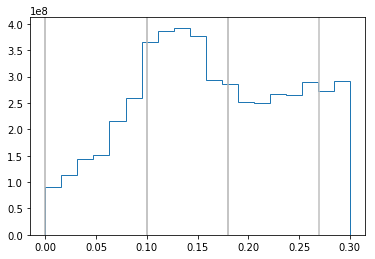

In [62]:
plt.hist(1./stardata['stellarformationtime'] - 1, bins=np.linspace(0,0.3, 20), histtype='step', weights=stardata['Mass']**1)
plt.axvline(0.1, c='0.7')
plt.axvline(0., c='0.7')
plt.axvline(0.18, c='0.7')
plt.axvline(0.27, c='0.75')
plt.show()